In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Library.Lin_alg import*
import prettytable as pt

# Q.1 Solve the system using Cholesky decomposition (check for symmetric matrix) and Gauss-Seidel to a precision of $10^{−6}$

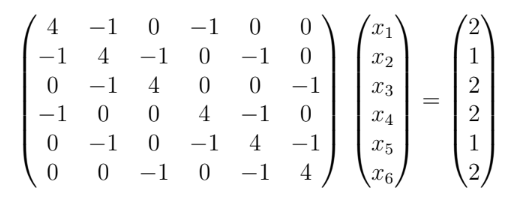

In [2]:
#constracting the matrix
A = [
    [4, -1, 0, -1, 0, 0], 
    [-1, 4 , -1, 0, -1, 0], 
    [0, -1, 4, 0, 0, -1],
    [-1, 0, 0, 4, -1, 0], 
    [0, -1, 0, -1, 4, -1], 
    [0, 0, -1, 0, -1, 4]
]
#check the symmetry of the matrix
b = [[2], [1], [2], [2], [1], [2]]

In [3]:
K = LinearEquationDirect(A, b)
K.Symmetric(A)

True

In [4]:
C = K.Cholesky()
print(C)

[[1.0], [1.0], [1.0], [1.0], [1.0001], [1.0]]


In [5]:
I = LinearEquationIndirect(A, b)
G = I.Gauss_Seidel(A,b,6)


Number of iterations is: 7 
The solution vector x is:

[[0.9184604230595137], [0.9488166745040213], [0.7268709866623936], [0.7250250177340336], [0.7134519420509559], [0.5429765977086388]]


# Q.2 Solve the following linear equation by Gauss-Jordon and LU factorization.

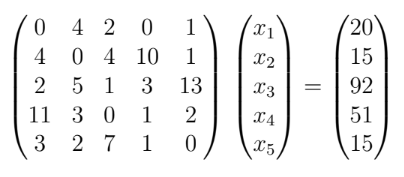

In [6]:
E = [[0, 4 ,2 ,0 ,1],
     [4, 0 ,4, 10, 1],
     [2,5,1,3,13],
     [11,3,0,1,2],
     [3,2,7,1,0]]
F = [20,15,92,51,15]

In [7]:
i = LinearEquationDirect(E, F)
g = i.Gauss_Jordan()
print(g)

l = i.LU_decompose()
print(l)

[2.6746020516448534, 3.7118853908737197, -0.05330739299610965, -0.07442518570923262, 5.259073222497346]
[2.6746020516448534, 3.7118853908737197, -0.05330739299610965, -0.07442518570923262, 5.259073222497346]


# Q.3 Solve the following almost sparse system A x = b using and Conjugate Gradient to find the inverse of the matrix A to a precision of $10^{-6}$

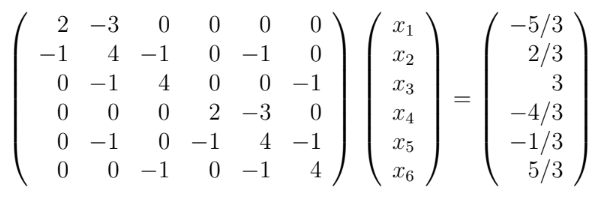

In [8]:
def conjugate_gradient_solve(A: list,B: list,guess: list,T: float):
    '''
    # Cojugate Gradient Method
    Solves the Linear Equation A.X = B using Conjugate Gradient Method
    ## Parameters
    - A: The matrix A in the equation A.X = B. A must be a symmetric and positive definite matrix
    - B: The matrix B in the equation A.X = B
    - guess: The initial guess for the solution
    - T: Tolerance
    ## Returns
    - X: The solution of the equation A.X = B
    - i: Number of iterations required to reach the tolerance
    '''
    x0 = guess
    r0 = np.add(B, -1 * np.matmul(A, x0))
    d0 = np.copy(r0)
    i = 1
    while True:
        alpha1 = np.matmul(np.transpose(r0), r0) / np.matmul(np.transpose(d0), np.matmul(A, d0))
        x1 = np.add(x0, alpha1[0][0]*d0)
        r1 = np.add(r0, -1 * alpha1[0][0] * np.matmul(A, d0))
        if np.linalg.norm(r1) < T and i<=len(A):
            return x1.tolist(),i
        
        elif i>len(A):
            print("Maybe the matrix A dosent satisfy the conditions for the Conjugate Gradient Method")
            return None
        else: 
            beta1 = np.matmul(np.transpose(r1), r1) / np.matmul(np.transpose(r0), r0)
            d1 = np.add(r1, beta1[0][0] * d0)
            x0 = x1
            del x1
            r0 = r1
            del r1
            d0 = d1
            del d1
            i+=1

In [19]:
A = [[2,-3,0,0,0,0],
     [-1,4,-1,0,-1,0],
     [0,-1,4,0,0,-1],
     [0,0,0,2,-1,0],
     [0,-1,0,-1,4,-1],
     [0,0,-1,0,-1,4]]
b = [[-5/3],[2/3],[3],[-4/3],[-1/3],[5/3]]
guess = [[1],[1],[1],[1],[1],[1]]
T = 0.0001
i = LinearEquationIndirect(A, b)
j = i.diag_dmnt(A)

Matrix is not diagonally dominant 



In [20]:
G = i.Gauss_Seidel(A,b,6)

Matrix is not diagonally dominant 

Guass-Seidal not possible


In [16]:
X,i = conjugate_gradient_solve(A,b,guess,T)

Maybe the matrix A dosent satisfy the conditions for the Conjugate Gradient Method


TypeError: cannot unpack non-iterable NoneType object

# Q.4